In [1]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd 
import matplotlib 
import matplotlib.pyplot as plt
from shapely.geometry import Point
from geopandas import GeoDataFrame

In [3]:
data20 = pd.read_csv('311_March_April2020.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (31,34) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data19 = pd.read_csv('311_March_April2019.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (8,17,31,32,34,35,36,37) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
gdf20 = gpd.GeoDataFrame(
    data20, geometry=gpd.points_from_xy(data20.Longitude, data20.Latitude))

gdf19 = gpd.GeoDataFrame(
    data19, geometry=gpd.points_from_xy(data19.Longitude, data19.Latitude))

In [6]:
nypd19 = gdf19.loc[gdf19['Agency']=='NYPD']

nypd20 = gdf20.loc[gdf20['Agency']=='NYPD']

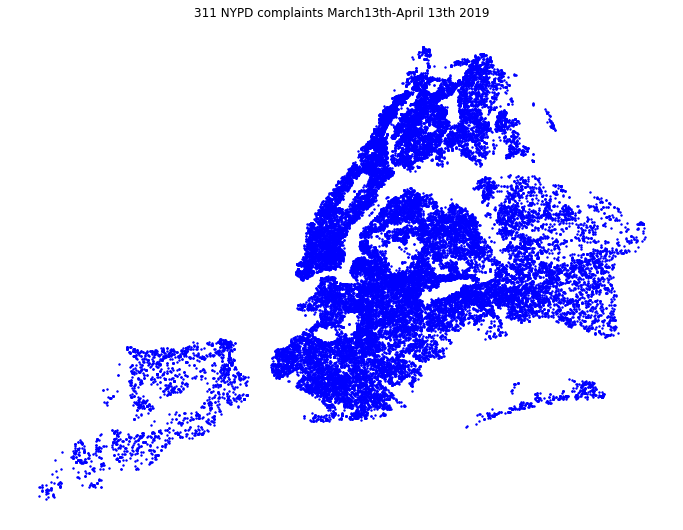

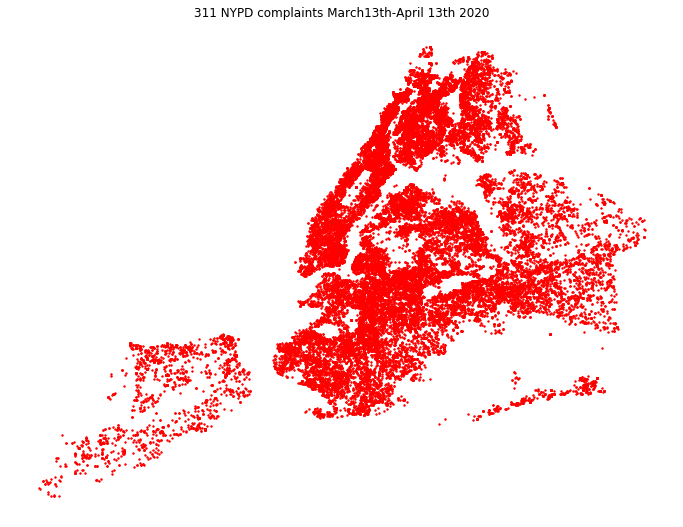

In [7]:
nypd19.plot( color='blue',legend=True,figsize=(12, 12), markersize=2)
plt.axis('off')
plt.title('311 NYPD complaints March13th-April 13th 2019')
nypd20.plot( color='red',legend=True,figsize=(12, 12),markersize=2)
plt.axis('off')
plt.title('311 NYPD complaints March13th-April 13th 2020')
plt.show()

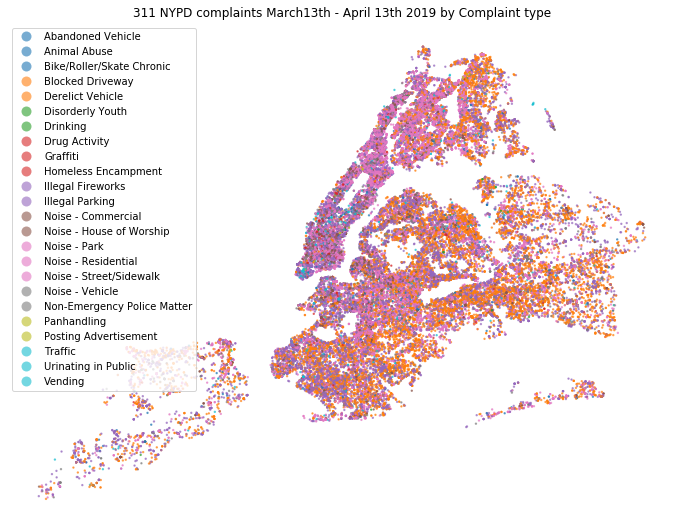

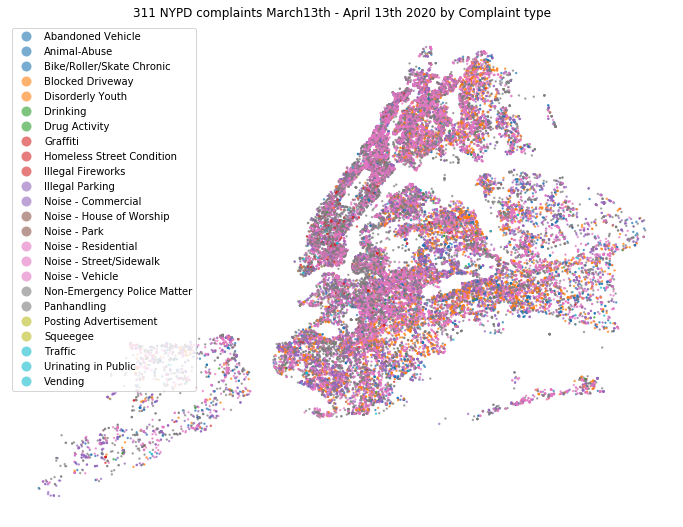

In [8]:
#2019
ax =nypd19.plot(column='Complaint Type',legend=True,figsize=(12, 12), alpha = 0.6,markersize=2)
plt.title('311 NYPD complaints March13th - April 13th 2019 by Complaint type')
plt.axis('off')
plt.show()


#2020 
ax = nypd20.plot(column='Complaint Type',legend=True,figsize=(12, 12),alpha = 0.6,markersize=2)
plt.title('311 NYPD complaints March13th - April 13th 2020 by Complaint type')
plt.axis('off')
plt.show()

In [9]:
nypd19['Complaint Type'].unique()

array(['Noise - Residential', 'Blocked Driveway', 'Noise - Commercial',
       'Derelict Vehicle', 'Illegal Parking', 'Noise - Vehicle',
       'Noise - Street/Sidewalk', 'Drinking', 'Drug Activity',
       'Animal Abuse', 'Homeless Encampment', 'Traffic', 'Noise - Park',
       'Vending', 'Panhandling', 'Non-Emergency Police Matter',
       'Bike/Roller/Skate Chronic', 'Graffiti', 'Urinating in Public',
       'Noise - House of Worship', 'Posting Advertisement',
       'Illegal Fireworks', 'Abandoned Vehicle', 'Disorderly Youth'],
      dtype=object)

In [10]:
#group.by nypd complaints

#2019
nypd19_count_type = nypd19.groupby(['Complaint Type']).count()
#2020
nypd20_count_type = nypd20.groupby(['Complaint Type']).count()

In [23]:
nypd19_count_type.head(41)

Complaint Type
Abandoned Vehicle                  1
Illegal Fireworks                  2
Posting Advertisement              9
Disorderly Youth                   9
Graffiti                          17
Urinating in Public               38
Panhandling                       57
Noise - House of Worship          57
Bike/Roller/Skate Chronic         58
Drinking                          81
Drug Activity                    148
Noise - Park                     174
Homeless Encampment              285
Vending                          338
Traffic                          378
Animal Abuse                     638
Non-Emergency Police Matter      686
Noise - Vehicle                 3299
Derelict Vehicle                3698
Noise - Commercial              3748
Noise - Street/Sidewalk         4315
Blocked Driveway               11418
Illegal Parking                16245
Noise - Residential            18314
Name: Unique Key, dtype: int64

In [24]:
nypd20_count_type.head(41)

Complaint Type
Squeegee                           1
Posting Advertisement              4
Illegal Fireworks                  8
Bike/Roller/Skate Chronic         20
Panhandling                       20
Disorderly Youth                  23
Urinating in Public               55
Graffiti                          59
Noise - House of Worship          59
Vending                          110
Traffic                          110
Drinking                         128
Noise - Park                     132
Drug Activity                    233
Animal-Abuse                     390
Homeless Street Condition        423
Abandoned Vehicle               1408
Noise - Commercial              1420
Noise - Vehicle                 3132
Blocked Driveway                4664
Noise - Street/Sidewalk         5693
Illegal Parking                 7788
Non-Emergency Police Matter     9994
Noise - Residential            23294
Name: Unique Key, dtype: int64

In [14]:
nypd19_count_type = nypd19_count_type['Unique Key']
nypd20_count_type = nypd20_count_type['Unique Key']

In [15]:
nypd19_count_type.head(10)

Complaint Type
Abandoned Vehicle                1
Animal Abuse                   638
Bike/Roller/Skate Chronic       58
Blocked Driveway             11418
Derelict Vehicle              3698
Disorderly Youth                 9
Drinking                        81
Drug Activity                  148
Graffiti                        17
Homeless Encampment            285
Name: Unique Key, dtype: int64

In [19]:
#most common NYPD complaints for both March/April 2019 and 2020:

nypd19_count_type = nypd19_count_type.sort_values()

nypd20_count_type = nypd20_count_type.sort_values()

In [20]:
nypd19_count_type.head(5)

Complaint Type
Abandoned Vehicle         1
Illegal Fireworks         2
Posting Advertisement     9
Disorderly Youth          9
Graffiti                 17
Name: Unique Key, dtype: int64

In [22]:
nypd20_count_type.head(5)

Complaint Type
Squeegee                      1
Posting Advertisement         4
Illegal Fireworks             8
Bike/Roller/Skate Chronic    20
Panhandling                  20
Name: Unique Key, dtype: int64